## Import and directories

In [1]:
#directories
import os
try:
    parentdir
except NameError:
    parentdir=os.getcwd()
else:
    parentdir = parentdir
homedir=r'/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/201702_S101toS104/S101d14Feb17_60.5_635_A2_CuAzu655';#data directory
print('The working directory is parentdir: %s' %parentdir)
print('The data directory is homedir: %s' %homedir)

The working directory is parentdir: /home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/Azurin_SM_repo/Analysis
The data directory is homedir: /home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/201702_S101toS104/S101d14Feb17_60.5_635_A2_CuAzu655


In [2]:
#Import modules
import os.path
import glob
import os
import re
from xlwt import Workbook

import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from numpy import sqrt, pi, exp, linspace, loadtxt

from pylab import *
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## Figure Parameters

In [3]:
mpl.rcParams["font.family"] = "sans-serif"
mpl.rcParams["font.size"] = "14"

## Python .py run

In [3]:
os.chdir(parentdir)
!python Analysis_CuAz_April2017.py
%run Analysis_CuAz_April2017.py

In [20]:
#Run this once to run the .py file.
os.chdir(parentdir)
!python Analysis_bis.py
%run Analysis_bis.py

## List of points

In [6]:
point_list(foldername=homedir)

,Point_1,Point_3,Point_4,Point_5,Point_6,Point_7,Point_8,Point_9,Point_10,Point_11,Point_12,Point_14,Point_15,Point_16,Point_18,Point_19
0,0,0,0,0,0,0,25,0,0,0,0.0,0,0,0,0,0
1,15,25,15,50,25,25,,15,100,15,10.0,,,10,10,25
2,20,75,20,,25,50,,20,,20,15.0,,,25,15,25
3,25,100,25,,50,75,,25,,25,20.0,,,40,20,35
4,35,,35,,60,100,,25,,25,25.0,,,45,25,50
5,40,,40,,75,,,35,,35,25.0,,,50,25,100
6,50,,50,,100,,,40,,40,35.0,,,60,35,
7,55,,55,,,,,50,,50,40.0,,,100,40,
8,60,,75,,,,,55,,55,45.0,,,,45,
9,75,,90,,,,,60,,60,50.0,,,,50,


### Missing point files

In [24]:
output = point_not_working(foldername = homedir, pointnumbers=range(100))
output

array([], dtype=float64)

/home/biswajit/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:804: RuntimeWarning: invalid value encountered in greater_equal
  not_smaller_than_edge = (sample[:, i] >= edges[i][-1])


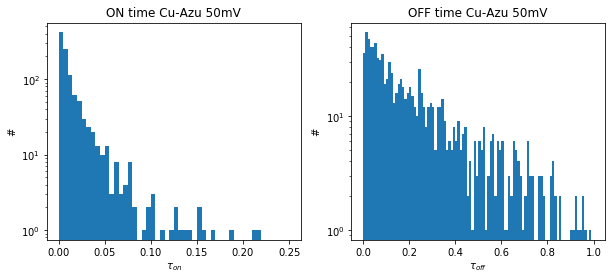

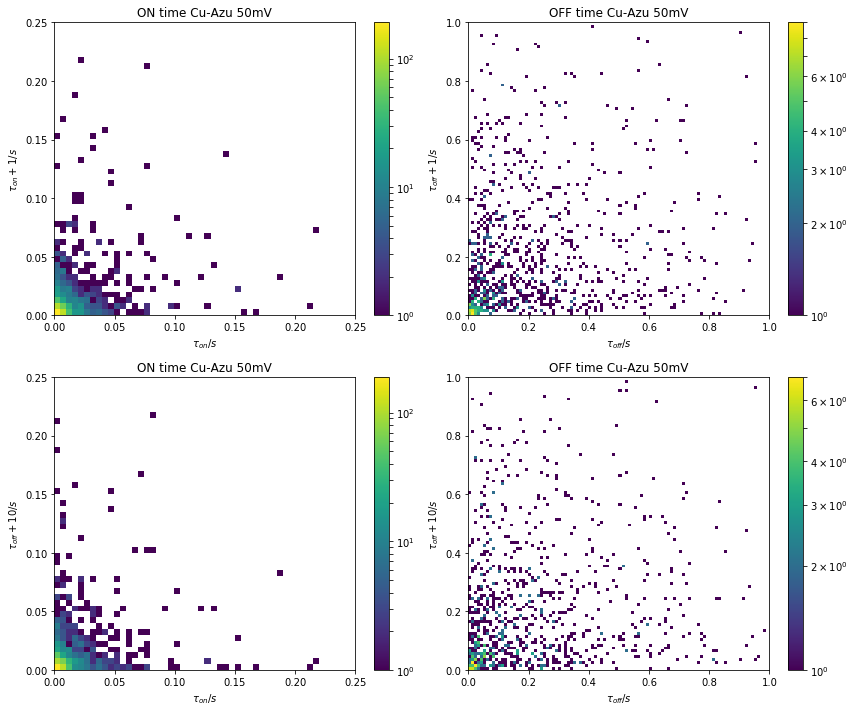

In [4]:
#*************Analysis for a specific potential********************

titel = 'average_on_and_off_time_specific_mV_Cu.xls' #name excell output file
pointnumbers = 31 #Change this to the minimal amount of points
pot = 18 #number of potentials
specific_potential = 50 #the specific potential you want the plots for
onMax=0.25;offMax=1;
rnge_on = [[0,onMax], [0,onMax]] #range on histograms, form: [[0,0.25], [0,0.25]] --> [xrange], [yrange]
rnge_off = [[0,offMax], [0,offMax]] #range off histograms
bins_on = 50  #bins for the on histograms
bins_off = 100 #bins for the off histograms
proteins = 'Cu' #change this to 'Zn' or 'Cu' depending on which files you are analysing. Changes title of plots.
current_dir = homedir#'S101d14Feb17_60.5_635_A2_CuAzu655' #foldername you want to work in.
max_his_on = onMax
max_his_off = offMax
x_shift = 10 # t vs  t + x_shift 

histograms(pot, pointnumbers, specific_potential, rnge_on, rnge_off, bins_on, bins_off, proteins, current_dir, max_his_on, max_his_off, x_shift, plots=True);

## Time trace plot

0.0
25.0
100.0
50.0


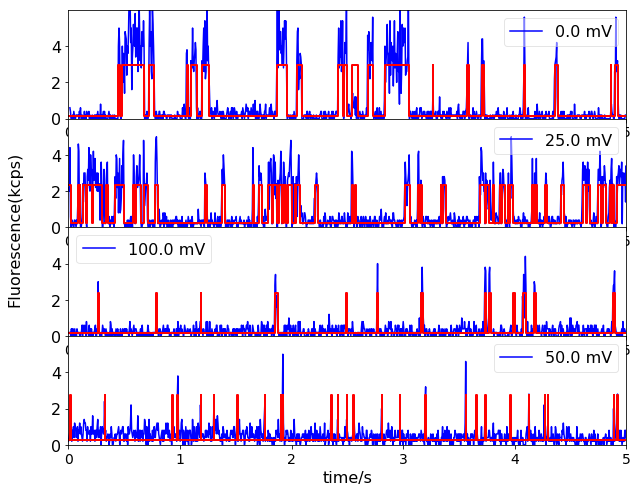

In [6]:
# folderpath = r'D:\Research\Experimental\Analysis\2017analysis\201702\Analysis_Sebby_March_2017\S101d14Feb17_60.5_635_A2_CuAzu655'
fig = time_trace_plot(foldername= homedir, input_potential=[0, 25, 50, 100], pointnumbers=[1], x_lim_min=0, y_lim_min=0, x_lim_max=5, y_lim_max=6, bin=5, show_changepoint=True)

## FCS plot

### Aexp(-t/t_ac)

(5.6149517615976183, 11.135664739515827, 0.50423139461737732)

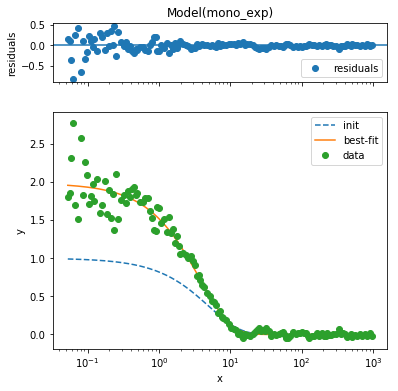

In [10]:
df_datn_em_specific, df_fcs_specific = get_point_specifics(foldername= homedir, input_potential=[90], pointnumbers=[1])
df_fcs=df_fcs_specific['filepath[FCS]'][0]
df_emplot = df_datn_em_specific['filepath[.em.plot]'][0]
df_datn = df_datn_em_specific['filepath[.datn]'][0]
def FCS_mono_fit(df_fcs,df_emplot, tmin=0.05,tmax=1000):
    df_fcs = pd.read_csv(df_fcs, index_col=False, names=None, skiprows=1, header=None, sep='\s+');
    df_fcs = df_fcs[df_fcs[0]>=tmin];
    df_fcs = df_fcs[df_fcs[0]<=tmax];
    xdata=df_fcs[0];
    ydata=df_fcs[1];
    df_em = pd.read_csv(df_emplot, header=None, sep='\t')#changepoint
    S=max(df_em[1]);
    Bkr=min(df_em[1]);
    correction_BG = (S/(S+Bkr))**2
    ydata= ((ydata)/correction_BG)
    def mono_exp(x, A, t_ac, t_rise):
        return A*exp(-x/t_ac)
    gmodel = Model(mono_exp)
    gmodel.set_param_hint('A', value=1, min=0.05, max=100)
    gmodel.set_param_hint('t_ac', value=5, min=1, max=100)
    gmodel.set_param_hint('t_rise', value=5, min=1, max=100)
    pars = gmodel.make_params()
    result = gmodel.fit(ydata, pars, x=xdata)#, A=1, B=1, t_ac=1
    A = result.best_values['A']
    t_ac = result.best_values['t_ac']
    toff = t_ac*(1+A); ton = t_ac*(1+(1/A));
    tratio_on_off = ton/toff
    return(ton, toff, tratio_on_off, result)#, t_on_err, t_off_err
ton, toff, tratio_on_off, result = FCS_mono_fit(df_fcs, df_emplot)
result.plot()
xscale('log')
ton, toff, tratio_on_off

## Time trace output folderwise

In [34]:
out_total = timetrace_outputs_folderwise(folderpath=homedir, pointnumbers=range(5), potentialist=potentialist)
out_total

Point_1                                                           \
   Potential t_ratio_timetrace                                          
   Potential            t_onav t_onaverr t_offav t_offaverr   t_ratio   
0        0.0             42.32     13.90  154.63      51.15  0.273686   
1       15.0             30.04      6.57   60.99      13.38  0.492540   
2       20.0             23.06      5.26   74.90      17.14  0.307877   
3       25.0             22.86      5.10   71.20      15.95  0.321067   
4       35.0             24.54      6.07   90.63      22.50  0.270771   
5       40.0             20.36      5.05   96.83      24.13  0.210265   
6       50.0              3.75      1.52  260.72     106.86  0.014383   
7       55.0             17.81      5.27  144.02      42.87  0.123663   
8       60.0             12.02      3.44  141.88      40.85  0.084719   
9       75.0              7.17      2.33  185.63      60.76  0.038625   
10      90.0              5.04      1.66  193.57      64.03  0.026037   
11     100.0              8.73      6.74  522.25     419.70  0.016716   

                                               ...               Point_4  \
              t_ratio_FCS                      ...     t_ratio_timetrace   
   t_ratioerr      t_onav t_onaverr t_offav    ...               t_offav   
0    0.127580         0.0       0.0     1.0    ...                154.63   
1    0.152577         2.0       5.0     2.0    ...                 60.99   
2    0.099477         4.0      10.0     3.0    ...                 74.90   
3    0.101508         6.0      15.0     4.0    ...                 71.20   
4    0.094892         8.0      20.0     5.0    ...                 90.63   
5    0.073929        10.0      25.0     6.0    ...                 96.83   
6    0.008291        12.0      30.0     7.0    ...                260.72   
7    0.051904        14.0      35.0     8.0    ...                144.02   
8    0.034393        16.0      40.0     9.0    ...                185.63   
9    0.017815        18.0      45.0    10.0    ...                193.57   
10   0.012154        20.0      50.0    11.0    ...                   NaN   
11   0.018629        22.0      55.0    12.0    ...                   NaN   

                                                                             \
                                   t_ratio_FCS                                
   t_offaverr   t_ratio t_ratioerr      t_onav t_onaverr t_offav t_offaverr   
0       51.15  0.273686   0.127580         0.0       0.0     1.0        0.0   
1       13.38  0.492540   0.152577         2.0       5.0     2.0        0.5   
2       17.14  0.307877   0.099477         4.0      10.0     3.0        1.0   
3       15.95  0.321067   0.101508         6.0      15.0     4.0        1.5   
4       22.50  0.270771   0.094892         8.0      20.0     5.0        2.0   
5       24.13  0.210265   0.073929        10.0      25.0     6.0        2.5   
6      106.86  0.014383   0.008291        12.0      30.0     7.0        3.0   
7       42.87  0.123663   0.051904        14.0      35.0     8.0        3.5   
8       60.76  0.038625   0.017815        16.0      40.0     9.0        4.0   
9       64.03  0.026037   0.012154        18.0      45.0    10.0        4.5   
10        NaN       NaN        NaN         NaN       NaN     NaN        NaN   
11        NaN       NaN        NaN         NaN       NaN     NaN        NaN   

                       
                       
   t_ratio t_ratioerr  
0      0.0        0.0  
1      6.0        7.0  
2     12.0       14.0  
3     18.0       21.0  
4     24.0       28.0  
5     30.0       35.0  
6     36.0       42.0  
7     42.0       49.0  
8     48.0       56.0  
9     54.0       63.0  
10     NaN        NaN  
11     NaN        NaN  

[12 rows x 39 columns]

In [19]:
df_datn_em_specific, df_fcs_specific = get_point_specifics(foldername= homedir, input_potential=[75], pointnumbers=[1])
df_fcs=df_fcs_specific['filepath[FCS]'][0]
df_emplot = df_datn_em_specific['filepath[.em.plot]'][0]
df_datn = df_datn_em_specific['filepath[.datn]'][0]
df_ton, df_toff, average_ton, average_toff, average_ton_err, average_toff_err = t_on_off_fromCP(df_datn, df_emplot)

print('Number of on-events: %d' %len(df_ton))
print('Number of off-events: %d' %len(df_toff))

Number of on-events: 153
Number of off-events: 151
